In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importation of data and definition of X and Y variables

In [ ]:
df = pd.read_csv("biodegradable_a.csv")

In [ ]:
df.head()

,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX,Biodegradable
0,3.919,2.6909,0.0,0.0,0.0,0.0,0.0,31.4,2.0,0.0,...,0.0,0.0,0.0,2.949,1.591,0.0,7.253,0.0,0.0,RB
1,4.170,2.1144,0.0,0.0,0.0,0.0,0.0,30.8,1.0,1.0,...,0.0,0.0,0.0,3.315,1.967,0.0,7.257,0.0,0.0,RB
2,3.932,3.2512,0.0,0.0,0.0,0.0,0.0,26.7,2.0,4.0,...,0.0,0.0,1.0,NaN,2.417,0.0,7.601,0.0,0.0,RB
3,3.000,2.7098,0.0,0.0,0.0,0.0,0.0,20.0,NaN,2.0,...,0.0,0.0,1.0,NaN,5.000,0.0,6.690,0.0,0.0,RB
4,4.236,3.3944,0.0,0.0,0.0,0.0,0.0,29.4,2.0,4.0,...,0.0,0.0,0.0,3.351,2.405,0.0,8.003,0.0,NaN,RB


In [ ]:
df.tail()

,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX,Biodegradable
4559,4.175650,3.454649,0.0,0.0,0.0,0.0,0.0,27.300000,2.0,2.0,...,0.0,0.0,0.0,3.398382,3.241090,0.0,7.406748,0.0,0.0,RB
4560,3.853731,2.747142,0.0,NaN,0.0,0.0,0.0,33.300000,0.0,0.0,...,0.0,0.0,1.0,3.429148,2.719309,0.0,7.511511,0.0,0.0,RB
4561,4.294771,3.471226,0.0,0.0,0.0,0.0,0.0,28.422154,2.0,2.0,...,0.0,0.0,0.0,3.351666,2.729456,0.0,7.699324,0.0,0.0,RB
4562,4.560376,3.896390,0.0,0.0,0.0,0.0,0.0,NaN,2.0,3.0,...,0.0,0.0,0.0,NaN,3.059198,0.0,7.908802,0.0,0.0,RB
4563,4.045097,2.847185,0.0,0.0,0.0,0.0,0.0,23.386643,1.0,1.0,...,0.0,2.0,2.0,3.032224,2.613357,1.0,6.863314,0.0,0.0,RB


In [ ]:
df.dtypes

SpMax_L          float64
J_Dz(e)          float64
nHM              float64
F01              float64
F04              float64
NssssC           float64
nCb              float64
C                float64
nCp              float64
nO               float64
F03              float64
SdssC            float64
HyWi_B           float64
LOC              float64
SM6_L            float64
F03_CO           float64
Me               float64
Mi               float64
nN_N             float64
nArNO2           float64
nCRX3            float64
SpPosA_B         float64
nCIR             float64
B01              float64
B03              float64
N_073            float64
SpMax_A          float64
Psi_i_1d         float64
B04              float64
SdO              float64
TI2_L            float64
nCrt             float64
C_026            float64
F02_CN           float64
nHDon            float64
SpMax_B          float64
Psi_i_A          float64
nN               float64
SM6_B            float64
nArCOOR          float64


In [ ]:
# convert Biodegradable to numeric
df["Biodegradable"].replace(['NRB', 'RB'], [0, 1], inplace=True)
df["Biodegradable"]

0       1
1       1
2       1
3       1
4       1
       ..
4559    1
4560    1
4561    1
4562    1
4563    1
Name: Biodegradable, Length: 4564, dtype: int64

In [ ]:
#count number of 0 and 1

vals, counts= np.unique(df["Biodegradable"], return_counts=True)
for v, c in zip(vals, counts):
    print(v, "--->", c)

0 ---> 739
1 ---> 3825


In [ ]:
X=df.drop(["Biodegradable"], axis = 1)
X

,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,nCrt,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX
0,3.919000,2.690900,0.0,0.0,0.0,0.0,0.0,31.400000,2.0,0.0,...,0.0,0.0,0.0,0.0,2.949000,1.591000,0.0,7.253000,0.0,0.0
1,4.170000,2.114400,0.0,0.0,0.0,0.0,0.0,30.800000,1.0,1.0,...,0.0,0.0,0.0,0.0,3.315000,1.967000,0.0,7.257000,0.0,0.0
2,3.932000,3.251200,0.0,0.0,0.0,0.0,0.0,26.700000,2.0,4.0,...,0.0,0.0,0.0,1.0,NaN,2.417000,0.0,7.601000,0.0,0.0
3,3.000000,2.709800,0.0,0.0,0.0,0.0,0.0,20.000000,NaN,2.0,...,0.0,0.0,0.0,1.0,NaN,5.000000,0.0,6.690000,0.0,0.0
4,4.236000,3.394400,0.0,0.0,0.0,0.0,0.0,29.400000,2.0,4.0,...,0.0,0.0,0.0,0.0,3.351000,2.405000,0.0,8.003000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4559,4.175650,3.454649,0.0,0.0,0.0,0.0,0.0,27.300000,2.0,2.0,...,0.0,0.0,0.0,0.0,3.398382,3.241090,0.0,7.406748,0.0,0.0
4560,3.853731,2.747142,0.0,NaN,0.0,0.0,0.0,33.300000,0.0,0.0,...,0.0,0.0,0.0,1.0,3.429148,2.719309,0.0,7.511511,0.0,0.0
4561,4.294771,3.471226,0.0,0.0,0.0,0.0,0.0,28.422154,2.0,2.0,...,NaN,0.0,0.0,0.0,3.351666,2.729456,0.0,7.699324,0.0,0.0
4562,4.560376,3.896390,0.0,0.0,0.0,0.0,0.0,NaN,2.0,3.0,...,0.0,0.0,0.0,0.0,NaN,3.059198,0.0,7.908802,0.0,0.0


In [ ]:
y = np.array(df["Biodegradable"])
y

array([1, 1, 1, ..., 1, 1, 1])

# Data processing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train.shape, X_test.shape

((3423, 41), (1141, 41))

In [ ]:
import math
math.sqrt(4563)

67.54998149518622

In [ ]:
D={"Data Scaling":[], 
   "Missing values": [],
   "Parametros": [],
   "precision": [],
   "recall": [],
   "f1": [],
   "mcc": []}


def present_reg_statistics(y_test, preds):
    precision=precision_score(y_test, preds)
    recall= recall_score(y_test, preds)
    f1=f1_score(y_test, preds)
    mcc= matthews_corrcoef(y_test, preds)
    #matrix = pd.DataFrame(confusion_matrix(y_test, preds))
    D["precision"].append(precision)
    D["recall"].append(recall)
    D["f1"].append(f1)
    D["mcc"].append(mcc)


def runner(scaler, imputer, modeler, X_train, y_train, X_test):
    #this is the heavy duty modeler, outputing predictions
    imputer.fit(X_train)
    Xt_train = imputer.transform(X_train)
    Xt_test  = imputer.transform(X_test)
    scaler.fit(Xt_train)
    Xt_train = scaler.transform(Xt_train)
    Xt_test  = scaler.transform(Xt_test)
    modeler.fit(Xt_train, y_train)
    return modeler.predict(Xt_test)


    
knn = KNeighborsClassifier(n_neighbors=68)

for sc in [MinMaxScaler(), StandardScaler(), Normalizer(), PowerTransformer()]:
    for i in ["SimpleImputer", "KNNImputer"]:
        if i == "SimpleImputer":
            for s in ['mean','median','most_frequent', 'constant']:
                imp = SimpleImputer(missing_values=np.nan, strategy=s)
                scaler = sc
                preds=runner(scaler, imp, knn, X_train, y_train, X_test)
                present_reg_statistics(y_test, preds)
                D["Data Scaling"].append(str(scaler))
                D["Missing values"].append("SimpleImputer")
                D["Parametros"].append(s)

        elif i == "KNNImputer":
            for w in ['uniform', 'distance']:
                imp = KNNImputer(n_neighbors=68, weights=w)
                scaler = sc
                preds=runner(scaler, imp, knn, X_train, y_train, X_test)
                present_reg_statistics(y_test, preds)
                D["Data Scaling"].append(str(scaler))
                D["Missing values"].append("KNNImputer")
                D["Parametros"].append(w)

In [ ]:
results=pd.DataFrame(D)

In [ ]:
results['f1'].nlargest(n=5)

18    0.959466
22    0.958890
23    0.958848
20    0.958398
19    0.957370
Name: f1, dtype: float64

In [ ]:
results.iloc[[18, 22, 23, 20, 19]]

,Data Scaling,Missing values,Parametros,precision,recall,f1,mcc
18,PowerTransformer(),SimpleImputer,mean,0.932203,0.988372,0.959466,0.738445
22,PowerTransformer(),KNNImputer,uniform,0.933000,0.986258,0.958890,0.735089
23,PowerTransformer(),KNNImputer,distance,0.933868,0.985201,0.958848,0.735290
20,PowerTransformer(),SimpleImputer,most_frequent,0.932068,0.986258,0.958398,0.731458
19,PowerTransformer(),SimpleImputer,median,0.931069,0.985201,0.957370,0.724361


The best way to handle data scaling and missing values is to use Power Transformer and Simple Imputer with strategy mean.

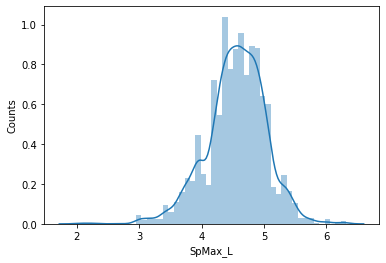

In [ ]:
#Plot a Histogram of the data 
ax = sns.distplot(X_train.iloc[:,0], kde=True)
ax.set(xlabel= 'SpMax_L', ylabel='Counts')
plt.show()

In [ ]:
#step 2
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, PowerTransformer
scaler   = PowerTransformer()
scaler.fit(X_train)
Xt_train = scaler.transform(X_train)
Xt_test  = scaler.transform(X_test)

In [ ]:
Xt_train

array([[-0.09278398,  1.35197475, -0.30136718, ...,  0.00656445,
        -0.22432607, -0.22986884],
       [-1.29964339,  0.68649298, -0.30136718, ..., -0.54002921,
        -0.22432607,         nan],
       [ 1.89088695, -1.7775494 ,  3.31878317, ...,  2.15486561,
        -0.22432607,         nan],
       ...,
       [ 0.42379634, -0.08114557, -0.30136718, ...,  0.22496739,
        -0.22432607, -0.22986884],
       [ 0.14108962, -0.11516648, -0.30136718, ...,  0.1246594 ,
        -0.22432607, -0.22986884],
       [ 0.1477993 ,  0.94633039, -0.30136718, ..., -0.05448142,
        -0.22432607, -0.22986884]])

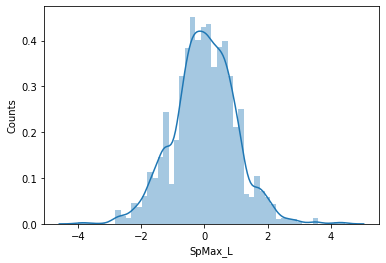

In [ ]:
#Plot a Histogram of the data 
ax = sns.distplot(pd.DataFrame(Xt_train).iloc[:,0], kde=True)
ax.set(xlabel= 'SpMax_L', ylabel='Counts')
plt.show()

In [ ]:
#step 3
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(Xt_train)
Xt_train = imp.transform(Xt_train)
Xt_test  = imp.transform(Xt_test)

In [ ]:
pd.DataFrame(Xt_train).isna().sum().sum()

0

# Feature selection

In [ ]:
BF = {"Method":[], "Best features":[]}

## Correlation

In [ ]:
#first append the y to the X matrix
N,M=Xt_train.shape
N,M
v=np.hstack((y_train.reshape((N,1)), Xt_train))
pd.DataFrame(v)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.0,-0.092784,1.351975,-0.301367,-8.354079e-02,-0.319469,-0.18307,-0.771870,-5.475558e-01,8.150663e-01,...,-0.124191,-0.460060,-0.426553,-0.875238,1.564373e-14,7.005691e-01,-0.472150,0.006564,-0.224326,-2.298688e-01
1,1.0,-1.299643,0.686493,-0.301367,-8.354079e-02,-0.319469,-0.18307,-0.771870,1.282164e-16,-1.211853e+00,...,-0.124191,-0.460060,-0.426553,1.323532,1.564373e-14,2.170402e+00,-0.472150,-0.540029,-0.224326,7.398960e-17
2,0.0,1.890887,-1.777549,3.318783,-8.354079e-02,3.132217,-0.18307,1.723049,1.100421e+00,-1.211853e+00,...,-0.124191,2.202335,2.367215,1.556152,2.043394e+00,4.546678e-01,2.141929,2.154866,-0.224326,7.398960e-17
3,1.0,-1.382427,-0.806562,-0.301367,-8.354079e-02,-0.319469,-0.18307,-0.771870,-5.459108e-01,8.150663e-01,...,-0.124191,-0.460060,-0.426553,-0.875238,-1.948023e+00,-1.678595e+00,-0.472150,-1.359809,-0.224326,-2.298688e-01
4,1.0,0.316536,-0.597834,-0.301367,-8.354079e-02,-0.319469,-0.18307,1.279817,7.086843e-01,-1.211853e+00,...,-0.124191,-0.460060,-0.426553,-0.875238,3.719282e-01,3.272375e-01,2.106932,0.550503,-0.224326,-2.298688e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,1.0,-0.363547,0.552684,-0.301367,-8.354079e-02,-0.319469,-0.18307,-0.771870,-2.006768e-01,3.315866e-16,...,-0.124191,-0.460060,-0.426553,-0.875238,7.189148e-02,-1.452417e+00,-0.472150,1.181981,-0.224326,-2.298688e-01
3419,1.0,-0.704591,-0.010301,-0.301367,-8.354079e-02,-0.319469,-0.18307,-0.771870,-2.176601e-01,8.713651e-02,...,-0.124191,-0.460060,-0.426553,-0.875238,1.564373e-14,-9.585045e-01,-0.472150,0.236842,-0.224326,-2.298688e-01
3420,1.0,0.423796,-0.081146,-0.301367,-8.354079e-02,-0.319469,-0.18307,1.279817,1.145858e+00,8.713651e-02,...,-0.124191,-0.460060,-0.426553,-0.875238,4.295688e-01,1.875355e-01,-0.472150,0.224967,-0.224326,-2.298688e-01
3421,1.0,0.141090,-0.115166,-0.301367,-1.407015e-17,-0.319469,-0.18307,0.856419,1.422892e+00,3.315866e-16,...,-0.124191,-0.460060,-0.426553,-0.875238,3.876928e-01,-9.656588e-02,-0.472150,0.124659,-0.224326,-2.298688e-01


In [ ]:
# correlation matrix
cm = pd.DataFrame(np.corrcoef(v.T))
cm

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.000000,-0.366233,0.060100,-0.508213,-0.179933,-0.464815,-0.389573,-0.245968,-0.146458,0.014731,...,-0.242450,-0.367889,-0.375465,-0.058145,-0.307970,0.101707,-0.350817,-0.372267,0.078806,-0.451672
1,-0.366233,1.000000,0.203912,0.266740,0.054433,0.215715,0.385064,0.474429,0.412093,-0.155526,...,0.190892,0.298778,0.083291,-0.028090,0.622778,0.084717,0.034689,0.724172,0.201638,0.181297
2,0.060100,0.203912,1.000000,0.047688,-0.062749,-0.085643,0.082650,-0.176207,-0.176260,0.058131,...,-0.188456,-0.047751,-0.071184,-0.092052,0.205517,0.405861,-0.106022,0.219580,-0.081547,0.035234
3,-0.508213,0.266740,0.047688,1.000000,0.111352,0.177286,0.117970,0.157147,0.050016,-0.089536,...,0.025557,0.266877,0.136269,0.017489,0.402410,0.035889,0.132308,0.455214,-0.062654,0.652961
4,-0.179933,0.054433,-0.062749,0.111352,1.000000,0.181887,0.069729,0.064848,0.004772,0.019378,...,-0.009783,0.102604,0.185807,0.063139,0.021094,0.017771,0.168420,0.072672,-0.000816,0.129697
5,-0.464815,0.215715,-0.085643,0.177286,0.181887,1.000000,0.061049,0.277274,0.161181,-0.130158,...,0.071967,0.358831,0.699063,0.215454,0.173645,-0.017145,0.672589,0.204737,-0.043348,0.130443
6,-0.389573,0.385064,0.082650,0.117970,0.069729,0.061049,1.000000,0.024863,-0.008749,0.217418,...,0.283019,0.063461,0.041624,0.026924,0.145330,0.012561,0.029309,0.165723,-0.025623,0.198295
7,-0.245968,0.474429,-0.176207,0.157147,0.064848,0.277274,0.024863,1.000000,0.710819,-0.406995,...,-0.050800,0.613671,0.131939,0.138884,0.418494,-0.018742,0.149328,0.421458,0.289984,0.129008
8,-0.146458,0.412093,-0.176260,0.050016,0.004772,0.161181,-0.008749,0.710819,1.000000,-0.356788,...,0.058033,0.347701,-0.025327,-0.166256,0.355234,-0.191529,-0.034504,0.404333,0.140801,0.092831
9,0.014731,-0.155526,0.058131,-0.089536,0.019378,-0.130158,0.217418,-0.406995,-0.356788,1.000000,...,-0.004070,-0.259486,-0.149101,-0.133449,-0.234835,-0.200078,-0.171366,-0.170803,-0.022604,-0.061564


In [ ]:
bf = []
for i in range(1, cm.shape[0]):
  if abs(cm.iloc[i,0]) > 0.35:
    bf.append(i)
bf = [x - 1 for x in bf]
bf

[0, 2, 4, 5, 10, 21, 24, 32, 33, 37, 38, 40]

In [ ]:
BF["Method"].append("Correlation")
BF["Best features"].append(bf)

## Stepwise

In [ ]:
N,M=Xt_train.shape

for model in [LinearRegression(), tree.DecisionTreeClassifier(max_depth=5),
              tree.DecisionTreeClassifier(max_depth=10),
              tree.DecisionTreeClassifier(max_depth=20)]:
              for d in ["forward", "backward"]:
                sfs = SequentialFeatureSelector(model, n_features_to_select=12, direction = d)
                sfs.fit(Xt_train, y_train)
                #get the relevant columns
                features=sfs.get_support()
                Features_selected =np.arange(M)[features]
                print("The features selected are columns: ", Features_selected)
                BF["Method"].append(("Stepwise", model, d))
                BF["Best features"].append(Features_selected)

The features selected are columns:  [ 2  4  5 13 14 17 19 21 29 31 33 40]
The features selected are columns:  [ 2  4  5 12 13 17 19 29 31 32 33 34]
The features selected are columns:  [ 2  5  6  9 10 15 16 29 31 32 33 34]
The features selected are columns:  [ 0  1  2  5  6  7 11 26 29 31 32 33]
The features selected are columns:  [ 2  4  5  6 10 20 25 27 29 31 33 39]
The features selected are columns:  [ 1  2  4  5  6 10 11 15 16 17 31 33]
The features selected are columns:  [ 2  5  6  8 10 15 19 20 23 24 31 34]
The features selected are columns:  [ 1  2  5  6  9 10 13 16 31 32 33 38]


## Random Forest

In [ ]:
rfr=RandomForestRegressor(random_state=0)
sel = SelectFromModel(estimator=rfr)
sel.fit(Xt_train, y_train)

print("Importances: ", sel.estimator_.feature_importances_)

print("Default threshold: ", sel.threshold_)

features=sel.get_support()
Features_selected =np.arange(M)[features]
print("The features selected are columns: ", Features_selected)

Importances:  [7.47846222e-03 2.59062164e-02 2.54575557e-01 5.24848775e-03
 5.62636090e-02 1.01395207e-01 5.37341792e-02 9.02596100e-03
 7.49665134e-03 3.55346701e-03 1.16608400e-01 2.04496738e-02
 1.02855925e-02 1.95929153e-02 1.15212846e-02 1.19720297e-02
 1.81548462e-02 1.31465262e-02 3.36271405e-04 9.48128877e-03
 1.30594632e-04 5.19918109e-02 4.15303559e-03 4.65063529e-04
 6.50827751e-04 1.47716746e-04 8.49499319e-03 1.06209923e-02
 1.63455358e-04 1.65706075e-02 1.53156380e-02 3.55046894e-02
 8.97497376e-03 3.02832345e-02 6.37765052e-03 9.18901974e-03
 2.24080516e-02 2.40911610e-03 1.45766029e-02 8.32928884e-04
 4.51237089e-03]
Default threshold:  0.024390243902439022
The features selected are columns:  [ 1  2  4  5  6 10 21 31 33]


In [ ]:
BF["Method"].append("Random Forest")
BF["Best features"].append(Features_selected)

## Evaluation of performance

In [ ]:
pd.DataFrame(BF)

,Method,Best features
0,Correlation,"[0, 2, 4, 5, 10, 21, 24, 32, 33, 37, 38, 40]"
1,"(Stepwise, LinearRegression(), forward)","[2, 4, 5, 13, 14, 17, 19, 21, 29, 31, 33, 40]"
2,"(Stepwise, LinearRegression(), backward)","[2, 4, 5, 12, 13, 17, 19, 29, 31, 32, 33, 34]"
3,"(Stepwise, DecisionTreeClassifier(max_depth=5)...","[2, 5, 6, 9, 10, 15, 16, 29, 31, 32, 33, 34]"
4,"(Stepwise, DecisionTreeClassifier(max_depth=5)...","[0, 1, 2, 5, 6, 7, 11, 26, 29, 31, 32, 33]"
5,"(Stepwise, DecisionTreeClassifier(max_depth=10...","[2, 4, 5, 6, 10, 20, 25, 27, 29, 31, 33, 39]"
6,"(Stepwise, DecisionTreeClassifier(max_depth=10...","[1, 2, 4, 5, 6, 10, 11, 15, 16, 17, 31, 33]"
7,"(Stepwise, DecisionTreeClassifier(max_depth=20...","[2, 5, 6, 8, 10, 15, 19, 20, 23, 24, 31, 34]"
8,"(Stepwise, DecisionTreeClassifier(max_depth=20...","[1, 2, 5, 6, 9, 10, 13, 16, 31, 32, 33, 38]"
9,Random Forest,"[1, 2, 4, 5, 6, 10, 21, 31, 33]"


Observing the best features among all methods, it's possible to conclude that the most common chosen features are 2, 4, 5, 6, 10, 19, 31, 33.

In [ ]:
best_cols = [2, 4, 5, 6, 10, 19, 31, 33]

In [ ]:
# a simplistic evaluation function running 2 algorithms and producing the F1 for each
def naif_model_testing(X_train, X_test, y_train, y_test):
    #test 2 approaches and print out the results
    
    rf= RandomForestClassifier(n_estimators=50, random_state=0)
    rf.fit(X_train, y_train)

    dt= tree.DecisionTreeClassifier(max_depth=5)
    dt.fit(X_train, y_train)

    rf_preds=rf.predict(X_test)
    dt_preds=dt.predict(X_test)

    print("F1 RFs: %7.4f" % f1_score(y_test, rf_preds))
    print("F1 DTs: %7.4f" % f1_score(y_test, dt_preds))

In [ ]:
naif_model_testing(Xt_train, Xt_test, y_train, y_test)

F1 RFs:  0.9816
F1 DTs:  0.9689


In [ ]:
nX_train = Xt_train[:, best_cols]
nX_test = Xt_test[:, best_cols]

In [ ]:
naif_model_testing(nX_train, nX_test, y_train, y_test)

F1 RFs:  0.9678
F1 DTs:  0.9614


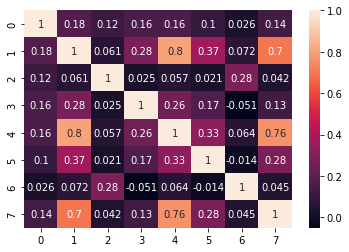

In [ ]:
corr_matrix = pd.DataFrame(nX_train).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Models

In [ ]:
D = {
    "Model":[],
    "Parameters":[],
     "MCC":[],
     "Prc":[],
     "Rec":[],
     "F1":[]
}

## Decision tree

In [ ]:
dt_params = {
    "criterion":["gini", "entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}

dt = tree.DecisionTreeClassifier()
dtgs = GridSearchCV(estimator=dt, param_grid=dt_params, scoring="f1")
dtgs = dtgs.fit(nX_train, y_train)

In [ ]:
dtgs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=4)

In [ ]:
D["Model"].append("Decision Tree")
D["Parameters"].append(dtgs.best_params_)

In [ ]:
preds = dtgs.best_estimator_.predict(nX_test)
D["MCC"].append(matthews_corrcoef(y_test, preds))
D["Prc"].append(precision_score(y_test, preds))
D["Rec"].append(recall_score(y_test, preds))
D["F1"].append(f1_score(y_test, preds))

## Logistic regression

In [ ]:
logr_params = {
    "C":np.logspace(-4, 4, 20),
}

logr = LogisticRegression()
logrgs = GridSearchCV(estimator=logr, param_grid=logr_params, scoring="f1")
logrgs = logrgs.fit(nX_train, y_train)

In [ ]:
logrgs.best_estimator_

LogisticRegression(C=0.23357214690901212)

In [ ]:
D["Model"].append("Logistic Regression")
D["Parameters"].append(logrgs.best_params_)

In [ ]:
preds = logrgs.best_estimator_.predict(nX_test)
D["MCC"].append(matthews_corrcoef(y_test, preds))
D["Prc"].append(precision_score(y_test, preds))
D["Rec"].append(recall_score(y_test, preds))
D["F1"].append(f1_score(y_test, preds))

## Categorical naive bayes

In [ ]:
nb_params = {
    "alpha":[0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]
}

nb = CategoricalNB()
nbgs = GridSearchCV(estimator=nb, param_grid=nb_params, scoring="f1")
nbgs = nbgs.fit(nX_train, y_train)

In [ ]:
nbgs.best_estimator_

CategoricalNB(alpha=0.0001)

In [ ]:
D["Model"].append("Naive Bayes")
D["Parameters"].append(nbgs.best_params_)

In [ ]:
preds = nbgs.best_estimator_.predict(nX_test)
D["MCC"].append(matthews_corrcoef(y_test, preds))
D["Prc"].append(precision_score(y_test, preds))
D["Rec"].append(recall_score(y_test, preds))
D["F1"].append(f1_score(y_test, preds))

## K-Nearest Neighbors

In [ ]:
knn_params = {
    "n_neighbors": range(1,100),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

knn = KNeighborsClassifier()
knngs = GridSearchCV(estimator=knn, param_grid=knn_params, scoring="f1")
knngs = knngs.fit(nX_train, y_train)

In [ ]:
knngs.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=14, weights='distance')

In [ ]:
D["Model"].append("K-Nearest Neighbors")
D["Parameters"].append(knngs.best_params_)

In [ ]:
preds = knngs.best_estimator_.predict(nX_test)
D["MCC"].append(matthews_corrcoef(y_test, preds))
D["Prc"].append(precision_score(y_test, preds))
D["Rec"].append(recall_score(y_test, preds))
D["F1"].append(f1_score(y_test, preds))

## Linear Support Vector Classification

In [ ]:
lsvc_params = { 
    'C':[0.1,1,100,1000]
}

lsvc = LinearSVC()
lsvcgs = GridSearchCV(estimator=lsvc, param_grid=lsvc_params, scoring="f1")
lsvcgs = lsvcgs.fit(nX_train, y_train)

In [ ]:
lsvcgs.best_estimator_

LinearSVC(C=0.1)

In [ ]:
D["Model"].append("Linear Support Vector Classification")
D["Parameters"].append(lsvcgs.best_params_)

In [ ]:
preds = lsvcgs.best_estimator_.predict(nX_test)
D["MCC"].append(matthews_corrcoef(y_test, preds))
D["Prc"].append(precision_score(y_test, preds))
D["Rec"].append(recall_score(y_test, preds))
D["F1"].append(f1_score(y_test, preds))

## Support Vector Classification

In [ ]:
svc_params = { 
    'C':[0.1,1,100,1000],
    'kernel':['rbf','poly','sigmoid','linear'],
    'degree':[1,2,3,4,5,6],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

svc = SVC()
svcgs = RandomizedSearchCV(estimator=svc, param_distributions=svc_params, scoring="f1")
svcgs = svcgs.fit(nX_train, y_train)

In [ ]:
svcgs.best_estimator_

SVC(C=1000, degree=4, gamma=1)

In [ ]:
D["Model"].append("Support Vector Classification")
D["Parameters"].append(svcgs.best_params_)

In [ ]:
preds = svcgs.best_estimator_.predict(nX_test)
D["MCC"].append(matthews_corrcoef(y_test, preds))
D["Prc"].append(precision_score(y_test, preds))
D["Rec"].append(recall_score(y_test, preds))
D["F1"].append(f1_score(y_test, preds))

In [ ]:
pd.DataFrame(nX_train)

,0,1,2,3,4,5,6,7
0,-0.301367,-0.319469,-0.18307,-0.771870,-0.362207,-0.117991,-0.124191,-0.426553
1,-0.301367,-0.319469,-0.18307,-0.771870,-0.362207,-0.117991,-0.124191,-0.426553
2,3.318783,3.132217,-0.18307,1.723049,2.767574,-0.117991,-0.124191,2.367215
3,-0.301367,-0.319469,-0.18307,-0.771870,-0.362207,-0.117991,-0.124191,-0.426553
4,-0.301367,-0.319469,-0.18307,1.279817,2.767081,-0.117991,-0.124191,-0.426553
...,...,...,...,...,...,...,...,...
3418,-0.301367,-0.319469,-0.18307,-0.771870,-0.362207,-0.117991,-0.124191,-0.426553
3419,-0.301367,-0.319469,-0.18307,-0.771870,-0.362207,-0.117991,-0.124191,-0.426553
3420,-0.301367,-0.319469,-0.18307,1.279817,-0.362207,-0.117991,-0.124191,-0.426553
3421,-0.301367,-0.319469,-0.18307,0.856419,-0.362207,-0.117991,-0.124191,-0.426553


In [ ]:
two_vars = pd.DataFrame(nX_train).iloc[:, [3,7]]
two_vars.values

array([[-0.77187034, -0.42655323],
       [-0.77187034, -0.42655323],
       [ 1.7230494 ,  2.36721475],
       ...,
       [ 1.27981729, -0.42655323],
       [ 0.85641854, -0.42655323],
       [-0.77187034, -0.42655323]])

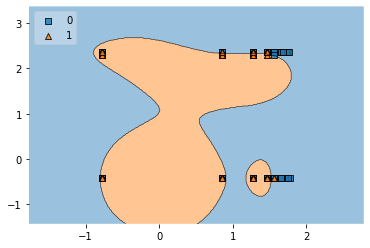

In [ ]:
svm = svcgs.best_estimator_
svm.fit(two_vars.values, y_train)
plot_decision_regions(two_vars.values, y_train, clf=svm, legend=2)
plt.show()

## Bagging classifier

In [ ]:
bc_dt_params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
}

bcdt = BaggingClassifier(tree.DecisionTreeClassifier())
bcgs = GridSearchCV(estimator=bcdt, param_grid=bc_dt_params, scoring="f1")
bcgs = bcgs.fit(nX_train, y_train)

In [ ]:
bcgs.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                        max_features='auto'),
                  max_samples=0.7, n_estimators=20)

In [ ]:
D["Model"].append("Bagging Classifier with Decision Tree")
D["Parameters"].append(bcgs.best_params_)

In [ ]:
preds = bcgs.best_estimator_.predict(nX_test)
D["MCC"].append(matthews_corrcoef(y_test, preds))
D["Prc"].append(precision_score(y_test, preds))
D["Rec"].append(recall_score(y_test, preds))
D["F1"].append(f1_score(y_test, preds))

In [ ]:
bc_gnb_params = {
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
}

bcgnb = BaggingClassifier(GaussianNB())
bcgs = GridSearchCV(estimator=bcgnb, param_grid=bc_gnb_params, scoring="f1")
bcgs = bcgs.fit(nX_train, y_train)

In [ ]:
bcgs.best_estimator_

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=2)

In [ ]:
D["Model"].append("Bagging Classifier with Gaussian NB")
D["Parameters"].append(bcgs.best_params_)

In [ ]:
preds = bcgs.best_estimator_.predict(nX_test)
D["MCC"].append(matthews_corrcoef(y_test, preds))
D["Prc"].append(precision_score(y_test, preds))
D["Rec"].append(recall_score(y_test, preds))
D["F1"].append(f1_score(y_test, preds))

## Random forest

In [ ]:
rf_params = { 
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy', 'log_loss']
}

rfdt = RandomForestClassifier(tree.DecisionTreeClassifier())
rfgs = GridSearchCV(estimator=rfdt, param_grid=rf_params, scoring="f1")
rfgs = rfgs.fit(nX_train, y_train)

In [ ]:
rfgs.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=50)

In [ ]:
D["Model"].append("Random Forest with Decision Tree")
D["Parameters"].append(rfgs.best_params_)

In [ ]:
preds = rfgs.best_estimator_.predict(nX_test)
D["MCC"].append(matthews_corrcoef(y_test, preds))
D["Prc"].append(precision_score(y_test, preds))
D["Rec"].append(recall_score(y_test, preds))
D["F1"].append(f1_score(y_test, preds))

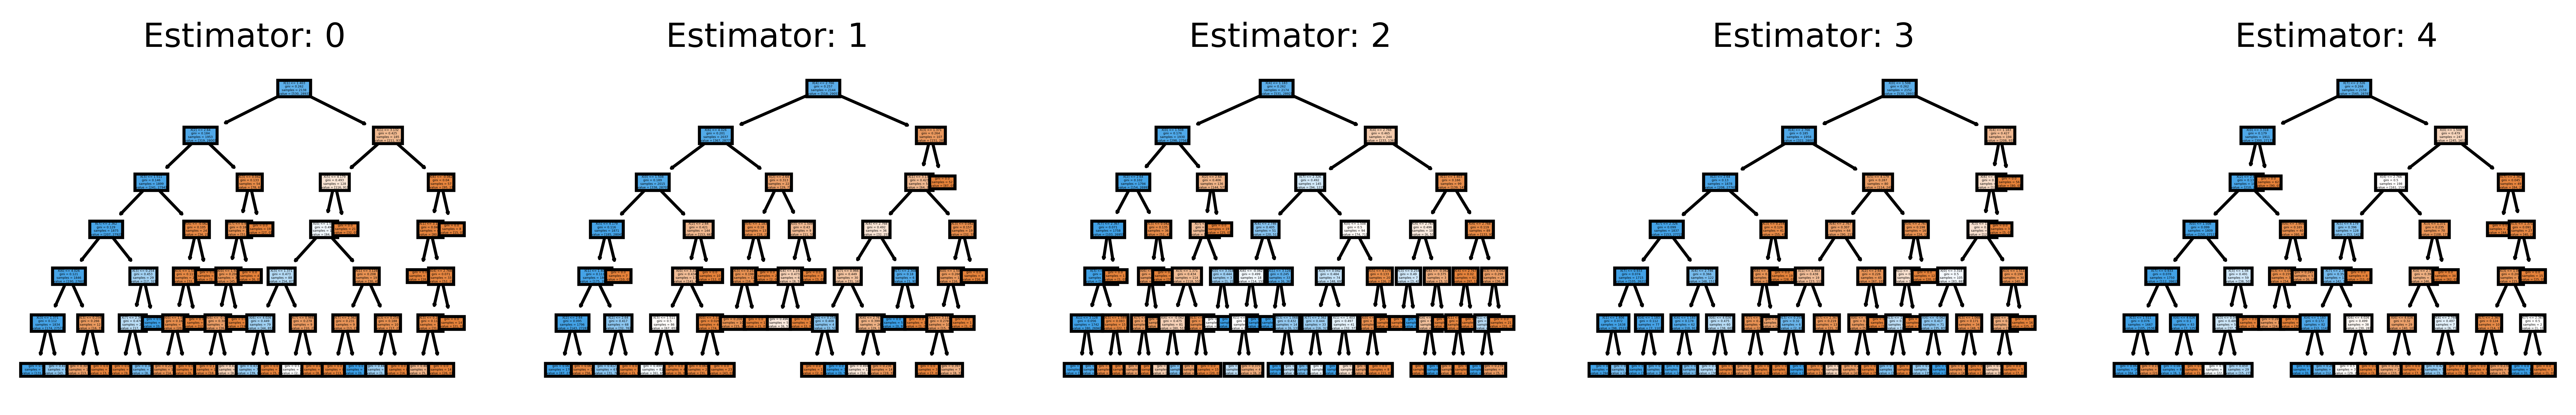

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (15,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rfgs.best_estimator_.estimators_[index],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [ ]:
rfgnb = RandomForestClassifier(GaussianNB())
rfgs = GridSearchCV(estimator=rfgnb, param_grid=rf_params, scoring="f1")
rfgs = rfgs.fit(nX_train, y_train)

In [ ]:
rfgs.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       n_estimators=200)

In [ ]:
D["Model"].append("Random Forest with Gaussian NB")
D["Parameters"].append(rfgs.best_params_)

In [ ]:
preds = rfgs.best_estimator_.predict(nX_test)
D["MCC"].append(matthews_corrcoef(y_test, preds))
D["Prc"].append(precision_score(y_test, preds))
D["Rec"].append(recall_score(y_test, preds))
D["F1"].append(f1_score(y_test, preds))

## Adaboost

In [ ]:
ab_dt_params = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1,1,5]}

ab_dt = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier())
abgs = GridSearchCV(estimator=ab_dt, param_grid=ab_dt_params, scoring="f1")
abgs = abgs.fit(nX_train, y_train)

In [ ]:
abgs.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=10),
                   learning_rate=0.01, n_estimators=1000)

In [ ]:
D["Model"].append("Adaboost with Decision Tree")
D["Parameters"].append(abgs.best_params_)

In [ ]:
preds = abgs.best_estimator_.predict(nX_test)
D["MCC"].append(matthews_corrcoef(y_test, preds))
D["Prc"].append(precision_score(y_test, preds))
D["Rec"].append(recall_score(y_test, preds))
D["F1"].append(f1_score(y_test, preds))

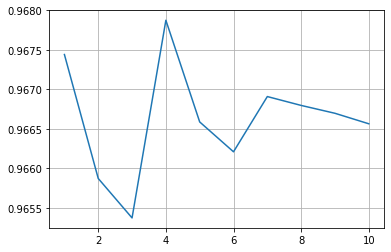

In [ ]:
f1s=[]
xs=range(1,11)
for i in xs:
    temp=[]
    dt=tree.DecisionTreeClassifier(max_depth=i)
    abc = AdaBoostClassifier(base_estimator=dt, n_estimators=20)
    for j in range(30):
        abc.fit(nX_train, y_train)
        preds=abc.predict(nX_test)
        temp.append(f1_score(y_test, preds))
    f1s.append(np.mean(temp))

plt.plot(xs, f1s)
plt.grid()
plt.show()

In [ ]:
ab_gnb_params = {'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1,1,5]}

ab_gnb = AdaBoostClassifier(base_estimator=GaussianNB())
abgs = GridSearchCV(estimator=ab_gnb, param_grid=ab_gnb_params, scoring="f1")
abgs = abgs.fit(nX_train, y_train)

In [ ]:
abgs.best_estimator_

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=0.01,
                   n_estimators=1000)

In [ ]:
D["Model"].append("Adaboost with GaussianNB")
D["Parameters"].append(abgs.best_params_)

In [ ]:
preds = abgs.best_estimator_.predict(nX_test)
D["MCC"].append(matthews_corrcoef(y_test, preds))
D["Prc"].append(precision_score(y_test, preds))
D["Rec"].append(recall_score(y_test, preds))
D["F1"].append(f1_score(y_test, preds))

## Gradient boosting

In [ ]:
gb_params = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10,50,250,1000]
}

gb = GradientBoostingClassifier()
gbgs = RandomizedSearchCV(estimator=gb, param_distributions=gb_params, scoring="f1")
gbgs = gbgs.fit(nX_train, y_train)

In [ ]:
gbgs.best_estimator_

GradientBoostingClassifier(learning_rate=0.15, max_depth=5, max_features='sqrt',
                           min_samples_leaf=0.1,
                           min_samples_split=0.28181818181818186,
                           n_estimators=1000, subsample=0.95)

In [ ]:
D["Model"].append("Gradient boosting")
D["Parameters"].append(gbgs.best_params_)

In [ ]:
preds = gbgs.best_estimator_.predict(nX_test)
D["MCC"].append(matthews_corrcoef(y_test, preds))
D["Prc"].append(precision_score(y_test, preds))
D["Rec"].append(recall_score(y_test, preds))
D["F1"].append(f1_score(y_test, preds))

## Xgboost

In [ ]:
xgb_params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

xgb = XGBClassifier()
xgbgs = GridSearchCV(estimator=xgb, param_grid=xgb_params, scoring="f1")
xgbgs = xgbgs.fit(nX_train, y_train)

In [ ]:
xgbgs.best_estimator_

XGBClassifier(max_depth=2, n_estimators=140)

In [ ]:
D["Model"].append("XGBoost")
D["Parameters"].append(xgbgs.best_params_)

In [ ]:
preds = xgbgs.best_estimator_.predict(nX_test)
D["MCC"].append(matthews_corrcoef(y_test, preds))
D["Prc"].append(precision_score(y_test, preds))
D["Rec"].append(recall_score(y_test, preds))
D["F1"].append(f1_score(y_test, preds))

## Comparing models

In [ ]:
results=pd.DataFrame(D)
results

,Model,Parameters,MCC,Prc,Rec,F1
0,Decision Tree,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.794962,0.946411,0.989429,0.967442
1,Logistic Regression,{'C': 0.23357214690901212},0.722553,0.948745,0.958774,0.953733
2,Naive Bayes,{'alpha': 0.0001},0.627483,0.931322,0.946089,0.938647
3,K-Nearest Neighbors,"{'metric': 'euclidean', 'n_neighbors': 14, 'we...",0.775335,0.952479,0.974630,0.963427
4,Linear Support Vector Classification,{'C': 0.1},0.722553,0.948745,0.958774,0.953733
5,Support Vector Classification,"{'kernel': 'rbf', 'gamma': 1, 'degree': 4, 'C'...",0.742545,0.942799,0.975687,0.958961
6,Bagging Classifier with Decision Tree,"{'base_estimator__max_depth': 20, 'base_estima...",0.795408,0.949135,0.986258,0.967341
7,Bagging Classifier with Gaussian NB,"{'bootstrap_features': False, 'max_features': ...",0.738772,0.964247,0.940803,0.952381
8,Random Forest with Decision Tree,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.805258,0.948381,0.990486,0.968976
9,Random Forest with Gaussian NB,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.801813,0.947422,0.990486,0.968475


# Results



This is the Confusion Matrix


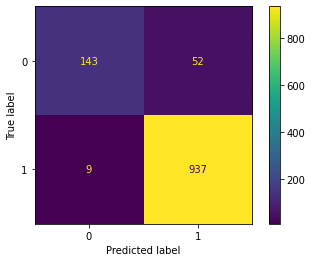

In [ ]:
preds = rfgs.best_estimator_.predict(nX_test)
print("This is the Confusion Matrix")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, preds))
cm_display.plot()
plt.show()